In [1]:
import pandas as pd 

In [2]:
import os
print(os.getcwd())


c:\Users\rey_d\Documents\GitHub\An-lisis-de-inversion-inmobiliario\notebooks


In [3]:
df = pd.read_csv(r'../data\listingsValencia.csv')

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### CAMBIO DE TIPOS

In [5]:
# lo primero que podemos comprobar es el tipo de dato de cada columna
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [7]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,48154,Precioso apartamento con wifi,219476,Antonio,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,154.0,3,177,2024-12-01,1.01,4,177,27,VT-41540-V
1,137143,PENTHOUSE ON FRONT LINE BEACH,670775,Cpi Gestión Encuentra Tu Mansión,POBLATS DEL SUD,EL SALER,39.36335,-0.31932,Entire home/apt,390.0,10,1,2013-07-02,0.01,5,64,0,VT32745V


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Comprobación de duplicados

In [10]:
df.duplicated().sum() #comprueba si hay duplicados

np.int64(0)

In [11]:
#comprobación de duplicados parciales
df_dup = df[df.duplicated(subset=['name', 'price', 'latitude', 'longitude'], keep=False)]
print(df_dup)


                       id                                        name  \
211               5956116         3 Bedrooms Apartment with free WIFI   
212               5956427         3 Bedrooms Apartment with free WIFI   
213               5956789         3 Bedrooms Apartment with free WIFI   
216               5957190      Centric 3 bedrooms Apartment with WIFI   
217               5957237      Centric 3 bedrooms Apartment with WIFI   
302               8399670      Centric 3 bedrooms Apartment with WIFI   
304               8399979      Centric 3 bedrooms Apartment with WIFI   
305               8400164      Centric 3 bedrooms Apartment with WIFI   
1340             26951498                  Bergamot House Single Room   
1344             26956688                 Bergamot House Double Suite   
1348             27013946               Bergamot House Suite Superior   
1349             27014295               Bergamot House Suite Superior   
1350             27014310               Bergamot Ho

In [12]:
df_dup.duplicated().sum() #comprueba si hay duplicados en las columnas seleccionadas

np.int64(0)

In [13]:
df_dup.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
211,5956116,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,47,2025-02-15,0.39,15,111,6,VT-32553-V
212,5956427,3 Bedrooms Apartment with free WIFI,30912672,Apartamentos FV Flats Valencia,CAMINS AL GRAU,ALBORS,39.4696,-0.35387,Entire home/apt,186.0,2,21,2025-01-03,0.19,15,110,3,VT-32555-V


In [14]:
# Mostrar todas las filas duplicadas (considerando todas las columnas)
duplicados = df[df.duplicated(keep=False)]

print("Filas duplicadas (todas las columnas):")
print(duplicados)


Filas duplicadas (todas las columnas):
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license]
Index: []


### comprobación de nulos

In [15]:
df.isnull().sum() #comprueba si hay valores nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              689
minimum_nights                       0
number_of_reviews                    0
last_review                       1553
reviews_per_month                 1553
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6234
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100 #porcentaje de valores nulos por columna

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              7.787951
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.553973
reviews_per_month                 17.553973
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           70.464564
dtype: float64

In [17]:
df['reviews_per_month'].max() #valor mínimo de la columna reviews_per_month

np.float64(34.85)

<Axes: >

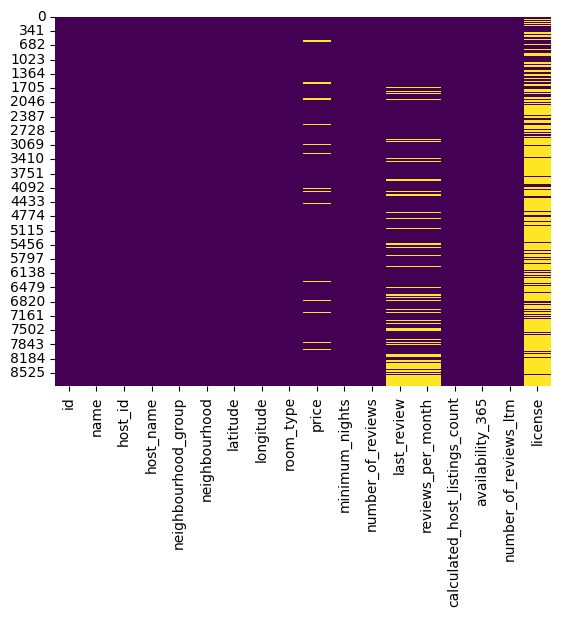

In [18]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [19]:
# al no corresponder a ninguno, cambiamos el valor nulo a sin datos
df['license'] = df['license'].fillna('Sin datos')

In [20]:
#creamos copia de df para no modificar el original
df_nuevo_valencia = df.copy()

In [21]:
df_nuevo_valencia = df_nuevo_valencia[['number_of_reviews', 'last_review', 'reviews_per_month','id']]

In [22]:
df_nuevo_valencia = df_nuevo_valencia[df_nuevo_valencia['last_review'].isnull()]
df_nuevo_valencia 

,number_of_reviews,last_review,reviews_per_month,id
11,0,NaT,NaN,276455
56,0,NaT,NaN,909800
103,0,NaT,NaN,1895636
125,0,NaT,NaN,2655162
141,0,NaT,NaN,3275736
...,...,...,...,...
8842,0,NaT,NaN,1376678698998326371
8843,0,NaT,NaN,1376702369604981548
8844,0,NaT,NaN,1376713264151194058
8845,0,NaT,NaN,1376757432745262395


In [23]:
df_nuevo_valencia['last_review'] = pd.to_datetime(df_nuevo_valencia['last_review'], errors='coerce')


In [24]:
#Rellenar los valores nulos con una fecha por defecto,
df_nuevo_valencia['last_review'] = pd.to_datetime(df_nuevo_valencia['last_review'])  # Asegura el tipo datetime
latest_date = df_nuevo_valencia['last_review'].max()
df_nuevo_valencia['last_review'] = df_nuevo_valencia['last_review'].fillna('2000-01-01')


In [25]:
print(df_nuevo_valencia['last_review'].notna().sum())


1553


In [26]:
#ver los valores no válidos en 'last_review'
invalid_dates = df_nuevo_valencia.loc[
    pd.to_datetime(df_nuevo_valencia['last_review'], errors='coerce').isna(),
    'last_review'
].unique()

print("Valores no válidos en 'last_review':", invalid_dates)


Valores no válidos en 'last_review': <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [27]:
# Cuántas filas totales tienes
print("Total filas:", len(df_nuevo_valencia))

# Cuántos valores no nulos tiene la columna last_review
print("Valores válidos en last_review:", df_nuevo_valencia['last_review'].notna().sum())

# Muestra primeras filas de la columna last_review para ver qué hay
print(df_nuevo_valencia['last_review'].head(10))


Total filas: 1553
Valores válidos en last_review: 1553
11    2000-01-01
56    2000-01-01
103   2000-01-01
125   2000-01-01
141   2000-01-01
239   2000-01-01
246   2000-01-01
249   2000-01-01
266   2000-01-01
297   2000-01-01
Name: last_review, dtype: datetime64[ns]


In [28]:
print(df_nuevo_valencia['last_review'].describe())


count                   1553
mean     2000-01-01 00:00:00
min      2000-01-01 00:00:00
25%      2000-01-01 00:00:00
50%      2000-01-01 00:00:00
75%      2000-01-01 00:00:00
max      2000-01-01 00:00:00
Name: last_review, dtype: object


<Axes: >

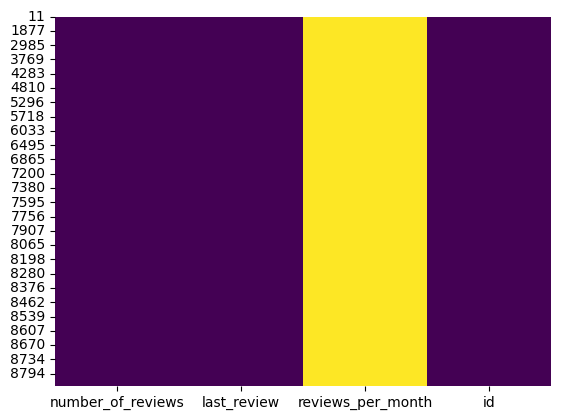

In [30]:
sns.heatmap(df_nuevo_valencia.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [31]:
#Tratar nulos como 0 antes de sumar

df_nuevo_valencia['reviews_per_month'].fillna(0).sum()

np.float64(0.0)

In [ ]:
#Recomendación de limpieza completa. 
# Rellenar valores nulos con 0, asumiendo que si no hay dato, no hubo reviews.
# Redondear al entero más cercano (por ejemplo: 2.4 → 2, 2.6 → 3).
#Convertir a tipo entero (int).